# Introduction

Montréal est reconnue comme la ville des cônes oranges. 
La ville porte mauvaise réputation de la qualité des routes, de plus qu’au Québec, 
nous somme la province qui paie le plus en réparations d’automobiles (https://www.guideautoweb.com/articles/59295/les-pires-routes-du-canada-sont-au-quebec/). 
En explorant les données de la ville nous avons pour objectif de voir si la qualité des routes de Montréal a un lien avec le nombre d’accidents dans la ville. 

Nous allons nous baser sur des groupes de données ouvertes présentes sur le site de donneesquebec.ca. 
Leur dernière consultation remonte au 26 avril 2021.

Liens:
-	https://www.donneesquebec.ca/recherche/dataset/vmtl-refection-de-chaussee-par-remplissage-mecanise-de-nid-de-poule
-	https://www.donneesquebec.ca/recherche/dataset/vmtl-avis-deterioration
-	https://www.donneesquebec.ca/recherche/dataset/vmtl-collisions-routieres

Le premier fichier reflète les remplissages des nis-de-poule, le deuxième (divisé en plusieurs sous-fichiers) tous les avis de détérioration des chaussées et le dernier les accidents rapportées par le SPVM.

# Code (python 3.8)

## Notes

- Pour que le code fonctionne les fichiers doivent être dans le même fichier/directory que le code
- Les fichiers doivent être sous format csv
- Les fichiers sont renommés de leur nom original pour simplifier le code
- L'environnement doit contenir les modules suivant: pandas, datetime et matplotlib

## Importation des modules nécessaires

In [266]:
import pandas as pd
import datetime as dt
import matplotlib as plt
import matplotlib.pyplot as pltp

## Ouverture des fichiers

**acquisition des fichiers**

In [267]:
df_collisions = pd.read_csv("collisions_routieres.csv", delimiter = ',', parse_dates = ["DT_ACCDN"])


df_avis = pd.read_csv("avis_deterioration.csv", delimiter = ',', parse_dates = ["date_inscription_avis_deterioration"])


df_remplissage_2016 = pd.read_csv("remplissage_2016.csv", delimiter = ',', parse_dates = ["DateJour"])

df_remplissage_2017 = pd.read_csv("remplissage_2017.csv", delimiter = ',', parse_dates = ["DateJour",])

df_remplissage_2018 = pd.read_csv("remplissage_2018.csv", delimiter = ',', parse_dates = ["DateJour"])

df_remplissage_2019 = pd.read_csv("remplissage_2019.csv", delimiter = ',', skiprows = 9, parse_dates = ["DateJour"])
# passer par dessus l'enemble de données des premières ligne
df_remplissage_2020 = pd.read_csv("remplissage_2020.csv", delimiter = ',', parse_dates = ["DateJour"])

df_remplissage = pd.concat([df_remplissage_2016, df_remplissage_2017, df_remplissage_2018, df_remplissage_2019, df_remplissage_2020])

In [268]:
df_remplissage['Id'] = df_remplissage['Appareil'].astype(str) + df_remplissage['DateJour'].astype(str) + df_remplissage['DateHeure'].astype(str) + df_remplissage['Latitude'].astype(str) + df_remplissage['Longitude'].astype(str)

**visualisation des dataframe**

In [269]:
df_collisions

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,NB_VICTIMES_VELO,VITESSE_AUTOR,LOC_X,LOC_Y,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LAT,LOC_LONG
0,SPVM _ 2012 _ 1,ME,2012-02-01,66102.0,3501.0,NaN,NaN,ST CHARLES,2.0,STAT,...,0,NaN,276517.37950,5.035127e+06,A,3,O,N,45.45550,-73.86162
1,SPVM _ 2012 _ 2,SA,2012-06-02,66023.0,NaN,NaN,NaN,NaN,NaN,COTE VERTU ET AUT 40,...,0,NaN,287913.26000,5.038666e+06,A,3,N,O,45.48772,-73.71603
2,SPVM _ 2012 _ 3,JE,2012-06-28,66023.0,NaN,NaN,NaN,COTE VERTU,1.0,DECARIE,...,0,50.0,290518.82501,5.041617e+06,A,1,N,N,45.51432,-73.68279
3,SPVM _ 2012 _ 4,ME,2012-07-11,66023.0,NaN,NaN,NaN,ST MATHIEU,1.0,RENE LEVESQUE,...,0,50.0,298822.88600,5.039146e+06,A,3,N,N,45.49221,-73.57647
4,SPVM _ 2012 _ 5,LU,2012-01-02,66023.0,4849.0,NaN,NaN,ST JEAN,NaN,NaN,...,0,NaN,277433.35738,5.038881e+06,A,1,O,N,45.48932,-73.85011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190547,SPVM _ 2019 _ 19292,ME,2019-12-18,66112.0,NaN,NaN,NaN,MORGAN,1.0,AUT 40 STIE,...,0,NaN,273170.29054,5.032564e+06,B,4,N,N,45.43229,-73.90425
190548,SPVM _ 2019 _ 19293,ME,2019-12-18,66102.0,NaN,NaN,NaN,CH STE MARIE,1.0,ST CHARLES,...,0,50.0,276810.13700,5.034694e+06,A,3,N,O,45.45162,-73.85785
190549,SPVM _ 2019 _ 19294,JE,2019-12-19,66102.0,NaN,NaN,NaN,CH STE MARIE,1.0,JEAN YVES,...,0,NaN,274598.28900,5.033401e+06,A,1,N,N,45.43989,-73.88605
190550,SPVM _ 2019 _ 19295,VE,2019-12-27,66107.0,462.0,NaN,NaN,LAKESHORE,NaN,NaN,...,0,40.0,275027.21900,5.030744e+06,A,2,N,N,45.41600,-73.88040


In [270]:
df_avis

,id,adresse,arrondissement,date_inscription_avis_deterioration,date_inscription_avis_regularisation,n_log,x,y,longitude,latitude
0,1,"783 - 785, avenue Ball",Villeray–Saint-Michel–Parc-Extension,2012-10-31,2019-07-04,15,294358.000,5043246.000,-73.633683,45.529053
1,2,"2520 - 2530, rue du Centre",Le Sud-Ouest,2012-12-07,NaN,6,299456.000,5037649.000,-73.568355,45.478746
2,3,"2511 - 2517, rue de Châteauguay",Le Sud-Ouest,2012-12-07,NaN,3,299479.000,5037622.000,-73.568061,45.478503
3,4,"6914, rue Hutchison",Villeray–Saint-Michel–Parc-Extension,2014-09-11,NaN,8,295496.000,5043175.000,-73.619113,45.528430
4,5,"3157, rue de Verdun",Verdun,2015-10-02,NaN,15,299260.000,5036908.000,-73.570854,45.472077
5,6,"165 - 171, 9e Avenue",Lachine,2017-11-29,NaN,4,291347.000,5032733.000,-73.671943,45.434401
6,7,"711 - 731, 4e Avenue",Lachine,2017-11-29,NaN,11,291666.000,5033651.000,-73.667891,45.442667
7,8,"4651-4657, rue St-André",Le Plateau - Mont-Royal,2019-04-15,NaN,7,298351.000,5043063.000,-73.582561,45.527454
8,9,"3201, boul. Henri-Bourassa Est",Montréal-Nord,2019-04-15,2019-11-26,33,293016.000,5049275.000,-73.651009,45.583282
9,10,"2331-2341, rue D'Iberville",Ville-Marie,2015-03-13,2017-11-29,6,300295.870,5043853.750,-73.557670,45.534585


On remaque que le nombre d'avis de détérioration est trop bas pour être utilisé de manière concrète un effet de causalité

In [271]:
df_remplissage

,Appareil,DateJour,DateHeure,Latitude,Longitude,Longitude\,Id
0,1,2016-12-07,11:16:39 AM,45.565970,-73.590370,NaN,12016-12-0711:16:39 AM45.56597-73.59037
1,1,2016-12-07,11:22:46 AM,45.565670,-73.589590,NaN,12016-12-0711:22:46 AM45.565670000000004-73.58959
2,1,2016-12-07,11:26:21 AM,45.565610,-73.589350,NaN,12016-12-0711:26:21 AM45.56561-73.58935
3,1,2016-12-07,11:32:55 AM,45.565290,-73.588750,NaN,12016-12-0711:32:55 AM45.565290000000005-73.58875
4,1,2016-12-07,11:42:04 AM,45.565820,-73.589560,NaN,12016-12-0711:42:04 AM45.56582-73.58955999999999
...,...,...,...,...,...,...,...
81349,NP-112,2020-03-20,01:20:31,45.478912,-73.626472,NaN,NP-1122020-03-2001:20:3145.478912353515604-73....
81350,NP-112,2020-03-20,01:21:10,45.478912,-73.626419,NaN,NP-1122020-03-2001:21:1045.478912353515604-73....
81351,NP-112,2020-03-20,01:21:55,45.478939,-73.626007,NaN,NP-1122020-03-2001:21:5545.478939056396506-73....
81352,NP-112,2020-03-20,01:22:40,45.478962,-73.625832,NaN,NP-1122020-03-2001:22:4045.4789619445801-73.62...


## Traitement des donnnées

**visualisation du nombre d'accidents par année**

In [272]:
groupe1 = df_collisions.groupby(df_collisions["DT_ACCDN"].dt.year).count()["NO_SEQ_COLL"]
groupe1

DT_ACCDN
2012    31652
2013    31607
2014    21402
2015    21574
2016    21668
2017    21974
2018    21379
2019    19296
Name: NO_SEQ_COLL, dtype: int64

<AxesSubplot:title={'center':'Fig. 1: Nombre de colisions par année'}, xlabel='Année', ylabel='Nombre de colisions'>

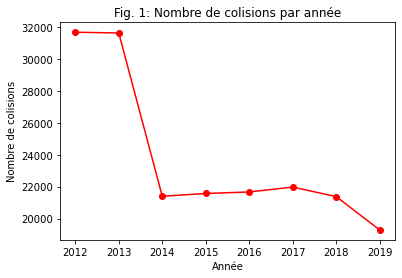

In [273]:
fig1 = groupe1.plot(marker = 'o', color = 'red')
fig1.set_xlabel("Année")
fig1.set_ylabel("Nombre de colisions")
fig1.set_title("Fig. 1: Nombre de colisions par année")
fig1

ici, il est intéressant de constater la chute de l'année 2013 à 2014

**visualisation du nombre de réparations des routes par année**

In [274]:
groupe2 = df_remplissage.groupby(df_remplissage["DateJour"].dt.year).count()['Id']
groupe2

DateJour
2016     13876
2017    205437
2018    199019
2019    174856
2020     81354
Name: Id, dtype: int64

<AxesSubplot:title={'center':'Fig. 2: Nombre de réparations par année'}, xlabel='Année', ylabel='Nombre de réparations'>

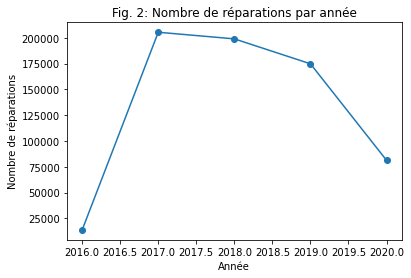

In [275]:
fig2 = groupe2.plot(marker = 'o')
fig2.set_xlabel("Année")
fig2.set_ylabel("Nombre de réparations")
fig2.set_title("Fig. 2: Nombre de réparations par année")
fig2

Ici, l'année 2016 semble eronnée, on soupçonne une mauvaise prise de données (garbage in, garbage out).

**Comparaison entre les deux jeux de données**

avec l'année 2016

In [276]:
groupe3 = pd.concat([groupe1, groupe2], axis=1, join="inner")
groupe3.columns = ['NBR_ACC', 'NBR_REP']
groupe3

,NBR_ACC,NBR_REP
2016,21668,13876
2017,21974,205437
2018,21379,199019
2019,19296,174856


In [277]:
corr_acc_rep_1 = groupe3['NBR_REP'].corr(groupe3['NBR_ACC'])
corr_acc_rep_1

-0.18249590869245086

Ici, on voit que la corrélation est pas très forte.

sans l'année 2016

In [278]:
groupe4 = groupe3.drop(axis=0, index=2016)
groupe4

,NBR_ACC,NBR_REP
2017,21974,205437
2018,21379,199019
2019,19296,174856


In [279]:
corr_acc_rep_2 = groupe4['NBR_REP'].corr(groupe4['NBR_ACC'])
corr_acc_rep_2

0.9999176171497632

En revanche, la corrélation devient très forte en enlevant l'année 2016.

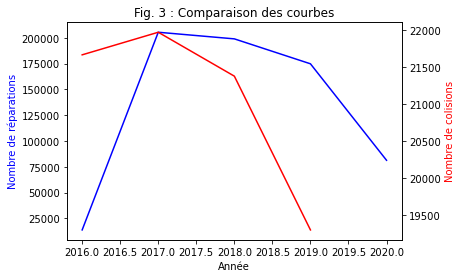

In [282]:
groupe5 = pd.concat([groupe1, groupe2], axis=1, join="outer")
groupe5.columns = ['NBR_ACC', 'NBR_REP']
groupe5 = groupe5.drop(axis = 0, index = 2012)
groupe5 = groupe5.drop(axis = 0, index = 2013)
groupe5 = groupe5.drop(axis = 0, index = 2014)
groupe5 = groupe5.drop(axis = 0, index = 2015)

x = groupe5.index
y1 = groupe5['NBR_REP']
y2 = groupe5['NBR_ACC']

fig3, ax1 = pltp.subplots()
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre de réparations', color = 'b')
ax1.set_title('Fig. 3 : Comparaison des courbes')

ax2 = ax1.twinx()
ax2.set_ylabel('Nombre de colisions', color = 'red')

curve1 = ax1.plot(x, y1, color = 'b')
curve2 = ax2.plot(x, y2, color = 'red')

# Conclusion

En se basant sur le fait que le nombre de nids-de-poules qu'on répare est un bon indice/indicateur de l'état des routes de la ville de Monréal, le nombre de remplissage de ces trous est en baisse. Il en est de même pour le nombre de collisions. De plus, les deux jeux de données semblent suivre le même type de courbe de 2017 à 2019, voir figure 3.

Face à tous nos calculs, on peut dire qu'il y a une tendance entre l'état des routes par la présence de nids-de-poules et le nombre de collisions de la ville de Montéal avec une corrélation de 0.9999176171497632. Cepandant, on se base seulement sur 3 années pour effectuer notre corrélation et de ce fait, il est impossible de confirmer hors de tout doute que c'est bel et bien le cas. Avec le temps et une bonne prise de données, on va pouvoir ajouter des années subséquentes et valider une fois pour toute si le lien de cause à effet est bel et bien fondé.